Устанавливаем нужные пакеты и потом импортируем их

In [3]:
!pip install numpy
!pip install matplotlib
!pip install sounddevice
!pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nickross\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nickross\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nickross\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nickross\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
!sudo apt-get install libportaudio2
!pip install sounddevice

"sudo" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\nickross\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [6]:
# глобальные переменные, которые нам нужны для генерации всех шумов. Можно обойтись и без них.

duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц

In [7]:
# счиетаем, сколько элементов будем генерировать.
#Не забываем привести к инту, так как и длительность (duration) и частота (sample_rate) могут быть вещественными

num_samples = int(duration * sample_rate)

In [8]:
# генерируем просто белый шум, не озадачиваесь его распределением. И печатаем.

white_noise_simple = np.random.random(num_samples)

print(white_noise_simple)

[0.93392147 0.77348224 0.18729628 ... 0.7829125  0.36994693 0.09886116]


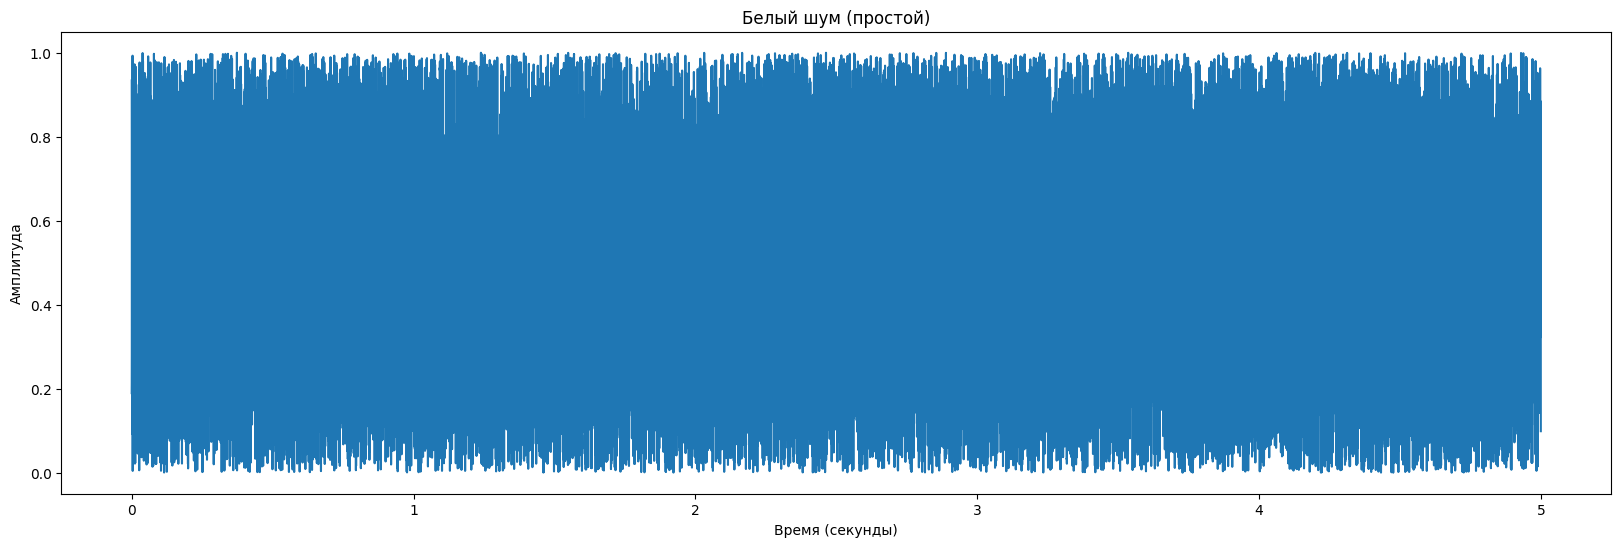

In [9]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion).
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_simple))

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise_simple)

# заголовки
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [10]:
# слушаем, что получилось
sd.play(white_noise_simple, sample_rate)
sd.wait()

KeyboardInterrupt: 

Задание. Сгенерите розовый шум путем первой генерации сигнала белого шума, преобразования его Фурье, затем деления амплитуд различных частотных составляющих на квадратный корень из частоты.

Вам понадобятся функции np.fft.rfft , np.real , np.sqrt

In [11]:
# генерируем розовый щум
fft = np.fft.rfft(white_noise_simple)
fft = np.real(fft) / np.sqrt(np.arange(1, len(fft) + 1))
pink_noise = np.fft.irfft(fft, len(white_noise_simple))
print(pink_noise)

[0.504567   0.49814639 0.49534144 ... 0.49785559 0.49534144 0.49814639]


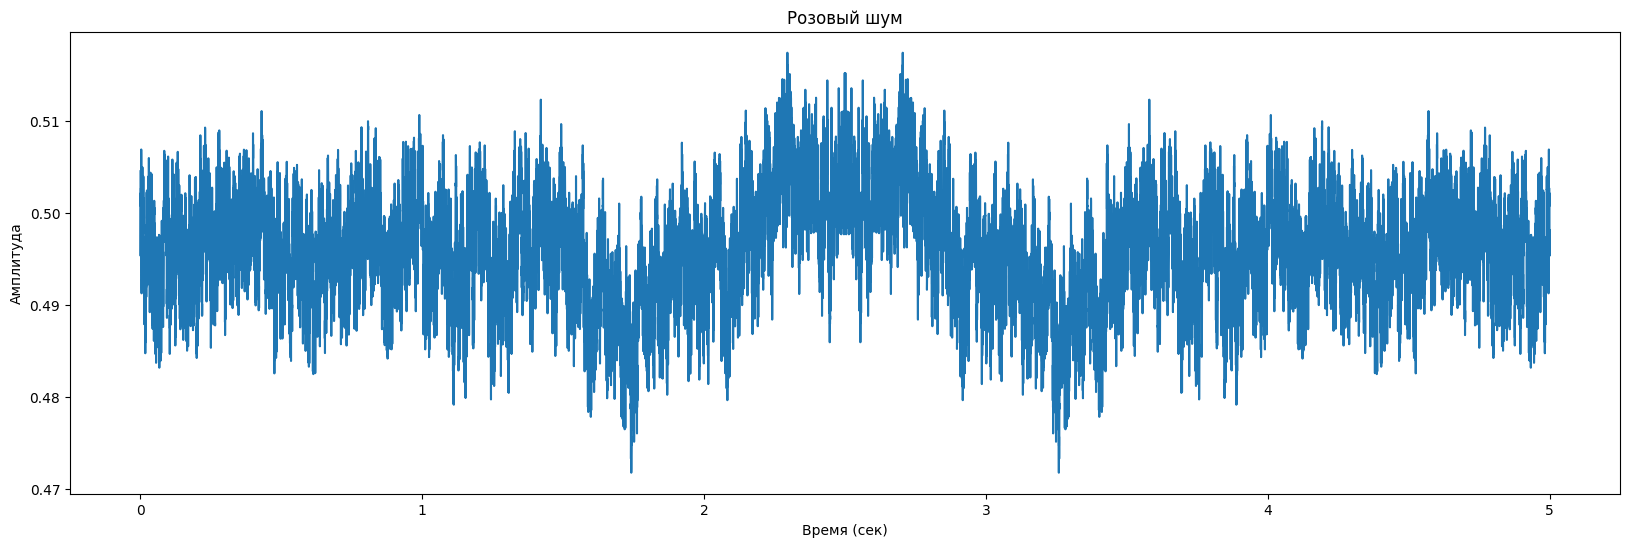

In [12]:
# отрисовываем, что получилось
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion).
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise))

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [13]:
# слушаем, что получилось
sd.play(pink_noise, sample_rate)
sd.wait()

KeyboardInterrupt: 

In [14]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

print(kb)
print(h)
print(c)

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось



black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]



1.380649e-23
6.62607015e-34
299792458.0


In [15]:
sd.play(black_noise, freq1)
sd.wait()

KeyboardInterrupt: 

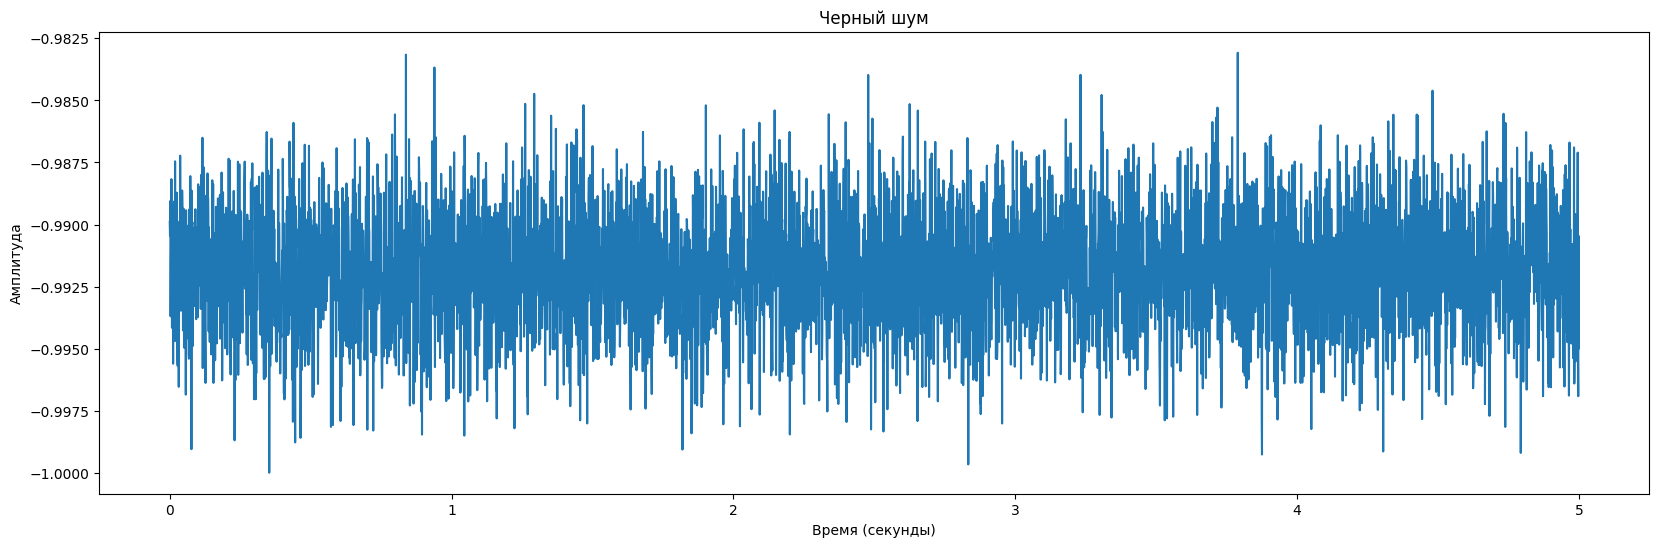

In [16]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()